In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


sns.set()  # Enables seaborn styling for all plots
# plt.style.use('seaborn')  <-- not needed now
%matplotlib inline

In [2]:
#Loading all the three datasets

confirmed_cases = pd.read_csv('time_series_covid-19_confirmed.csv')
deaths_reported = pd.read_csv('time_series_covid-19_deaths.csv')
recovered_cases = pd.read_csv('time_series_covid-19_recovered.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [4]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [6]:
# Extracting all the columns using the keys() function

cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [7]:
#Extracting only the dates columns that have information of confirmed, deaths and recovered cases

confirmed = confirmed_cases.loc[: ,cols[4]:cols[-1]]

In [8]:
deaths = deaths_reported.loc[: , cols[4]:cols[-1]]

In [9]:
recoveries = recovered_cases.loc[: , cols[4]:cols[-1]]

In [10]:
#check the head of the outbreak cases
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428


In [11]:
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
#Also, calculate the total mortality rate which is the death_sum/confirmed cases

In [13]:
dates = confirmed.keys()
world_cases = []
total_deaths= []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [14]:
#lets display each of the newly created variables

confirmed_sum

np.int64(167449)

In [15]:
death_sum

np.int64(6440)

In [16]:
recovered_sum

np.int64(76034)

In [17]:
#Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [18]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [19]:
world_cases

array([[   555],
       [   653],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30817],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76823],
       [ 78579],
       [ 78965],
       [ 79568],
       [ 80413],
       [ 81395],
       [ 82754],
       [ 84120],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101784],
       [105821],
       [109795],
       [113561],
       [118592],
       [125865],
       [128343],
       [145193],
       [156097],
       [167449]])

In [20]:
total_deaths

array([[  17],
       [  18],
       [  26],
       [  42],
       [  56],
       [  82],
       [ 131],
       [ 133],
       [ 171],
       [ 213],
       [ 259],
       [ 362],
       [ 426],
       [ 492],
       [ 564],
       [ 634],
       [ 719],
       [ 806],
       [ 906],
       [1013],
       [1113],
       [1118],
       [1371],
       [1523],
       [1666],
       [1770],
       [1868],
       [2007],
       [2122],
       [2247],
       [2251],
       [2458],
       [2469],
       [2629],
       [2708],
       [2770],
       [2814],
       [2872],
       [2941],
       [2996],
       [3085],
       [3160],
       [3254],
       [3348],
       [3460],
       [3558],
       [3802],
       [3988],
       [4262],
       [4615],
       [4720],
       [5404],
       [5819],
       [6440]])

In [21]:
total_recovered

array([[   28],
       [   30],
       [   36],
       [   39],
       [   52],
       [   61],
       [  107],
       [  126],
       [  143],
       [  222],
       [  284],
       [  472],
       [  623],
       [  852],
       [ 1124],
       [ 1487],
       [ 2011],
       [ 2616],
       [ 3244],
       [ 3946],
       [ 4683],
       [ 5150],
       [ 6295],
       [ 8058],
       [ 9395],
       [10865],
       [12583],
       [14352],
       [16121],
       [18177],
       [18890],
       [22886],
       [23394],
       [25227],
       [27905],
       [30384],
       [33277],
       [36711],
       [39782],
       [42716],
       [45602],
       [48228],
       [51170],
       [53796],
       [55865],
       [58358],
       [60694],
       [62494],
       [64404],
       [67003],
       [68324],
       [70251],
       [72624],
       [76034]])

In [22]:
#Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([ i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[: -10]

In [23]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [24]:
#Convert all the images into datetime for better visualixzation
start = '1/22/2020'

start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days = i)).strftime('%m/%d/%Y'))

In [25]:
#For visualization with the latest data of 15th of march

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [26]:
latest_confirmed

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [27]:
latest_deaths

0       1
1      22
2       0
3       0
4       0
       ..
445     0
446     0
447     0
448     0
449     0
Name: 3/15/20, Length: 450, dtype: int64

In [28]:
latest_recoveries

0       35
1      118
2      105
3        1
4       42
      ... 
445      0
446      0
447      0
448      0
449      0
Name: 3/15/20, Length: 450, dtype: int64

In [29]:
#Find the list of unique countries

unique_countries = list(confirmed_cases['Country/Region'].unique())

In [30]:
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [31]:
# Load data and define date columns
confirmed_cases = pd.read_csv('time_series_covid-19_confirmed.csv')
fixed_cols_count = 4 # Adjust if your initial non-date columns count is different
dates = confirmed_cases.columns[fixed_cols_count:].tolist()

# Prepare latest_confirmed as a DataFrame with Country/Region and the latest date's data
latest_confirmed = confirmed_cases[['Country/Region', dates[-1]]].copy()

# Clean column names (crucial for accurate access)
confirmed_cases.columns = confirmed_cases.columns.str.strip()
latest_confirmed.columns = latest_confirmed.columns.str.strip()


# User-provided list of unique countries
unique_countries = [
    'Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada', 'Australia',
    'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
    'Philippines', 'India', 'Italy', 'Sweden', 'Spain', 'Belgium', 'Egypt',
    'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria',
    'Croatia', 'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
    'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Estonia',
    'Netherlands', 'San Marino', 'Belarus', 'Iceland', 'Lithuania', 'Mexico',
    'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar',
    'Ecuador', 'Azerbaijan', 'Armenia', 'Dominican Republic', 'Indonesia',
    'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
    'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein',
    'Poland', 'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
    'Bhutan', 'Cameroon', 'Colombia', 'Costa Rica', 'Peru', 'Serbia',
    'Slovakia', 'Togo', 'Malta', 'Martinique', 'Bulgaria', 'Maldives',
    'Bangladesh', 'Paraguay', 'Albania', 'Cyprus', 'Brunei', 'US',
    'Burkina Faso', 'Holy See', 'Mongolia', 'Panama', 'China', 'Iran',
    'Korea, South', 'France', 'Cruise Ship', 'Denmark', 'Czechia', 'Taiwan*',
    'Vietnam', 'Russia', 'Moldova', 'Bolivia', 'Honduras', 'United Kingdom',
    'Congo (Kinshasa)', "Cote d'Ivoire", 'Jamaica', 'Reunion', 'Turkey', 'Cuba',
    'Guyana', 'Kazakhstan', 'Cayman Islands', 'Guadeloupe', 'Ethiopia', 'Sudan',
    'Guinea', 'Aruba', 'Kenya', 'Antigua and Barbuda', 'Uruguay', 'Ghana',
    'Jersey', 'Namibia', 'Seychelles', 'Trinidad and Tobago', 'Venezuela',
    'Curacao', 'Eswatini', 'Gabon', 'Guatemala', 'Guernsey', 'Mauritania',
    'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname',
    'occupied Palestinian territory', 'Kosovo', 'Central African Republic',
    'Congo (Brazzaville)', 'Equatorial Guinea', 'Uzbekistan'
]

country_confirmed_cases = []
no_cases = []

# Calculate cases per country
for country_name in unique_countries:
    country_data_df = latest_confirmed[latest_confirmed['Country/Region'] == country_name]
    cases = country_data_df[dates[-1]].sum() # Summing the latest date's column
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(country_name)

# Filter out countries with no cases and align case counts
unique_countries = [country for country in unique_countries if country not in no_cases]
temp_country_cases = []
for country_name in unique_countries:
    cases = latest_confirmed[latest_confirmed['Country/Region'] == country_name][dates[-1]].sum()
    temp_country_cases.append(cases)
country_confirmed_cases = temp_country_cases

# Sort countries by confirmed cases
sorted_country_cases = sorted(zip(unique_countries, country_confirmed_cases),
                              key=operator.itemgetter(1), reverse=True)
unique_countries = [country for country, cases in sorted_country_cases]
country_confirmed_cases = [cases for country, cases in sorted_country_cases]

# Print results
print('Confirmed Cases by Countries/Regions : ')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {int(country_confirmed_cases[i])} cases ') # Added int() for clean output


Confirmed Cases by Countries/Regions : 
China: 81003 cases 
Italy: 24747 cases 
Iran: 13938 cases 
Korea, South: 8162 cases 
Spain: 7798 cases 
Germany: 5795 cases 
France: 4513 cases 
US: 3499 cases 
Switzerland: 2200 cases 
Norway: 1221 cases 
United Kingdom: 1144 cases 
Netherlands: 1135 cases 
Sweden: 1022 cases 
Belgium: 886 cases 
Denmark: 875 cases 
Austria: 860 cases 
Japan: 839 cases 
Cruise Ship: 696 cases 
Malaysia: 428 cases 
Qatar: 401 cases 
Greece: 331 cases 
Australia: 297 cases 
Czechia: 253 cases 
Canada: 252 cases 
Israel: 251 cases 
Portugal: 245 cases 
Finland: 244 cases 
Singapore: 226 cases 
Slovenia: 219 cases 
Bahrain: 214 cases 
Estonia: 171 cases 
Iceland: 171 cases 
Brazil: 162 cases 
Philippines: 140 cases 
Romania: 131 cases 
Ireland: 129 cases 
Poland: 119 cases 
Indonesia: 117 cases 
Iraq: 116 cases 
Thailand: 114 cases 
India: 113 cases 
Kuwait: 112 cases 
Egypt: 110 cases 
Lebanon: 110 cases 
Saudi Arabia: 103 cases 
San Marino: 101 cases 
United Arab 

In [32]:

# --- Plot total confirmed cases between mainland China and outside mainland China ---
# Ensure 'China' exists in your 'Country/Region' column and `dates[-1]` exists
china_confirmed = latest_confirmed[latest_confirmed["Country/Region"] == 'China'][dates[-1]].sum()
# np.sum(country_confirmed_cases) refers to the sum of cases for the *user-provided list of countries*.
# If you want truly GLOBAL sum for "outside mainland China", it should be world_cases[-1] - china_confirmed
outside_mainland_china_confirmed = world_cases[-1] - china_confirmed

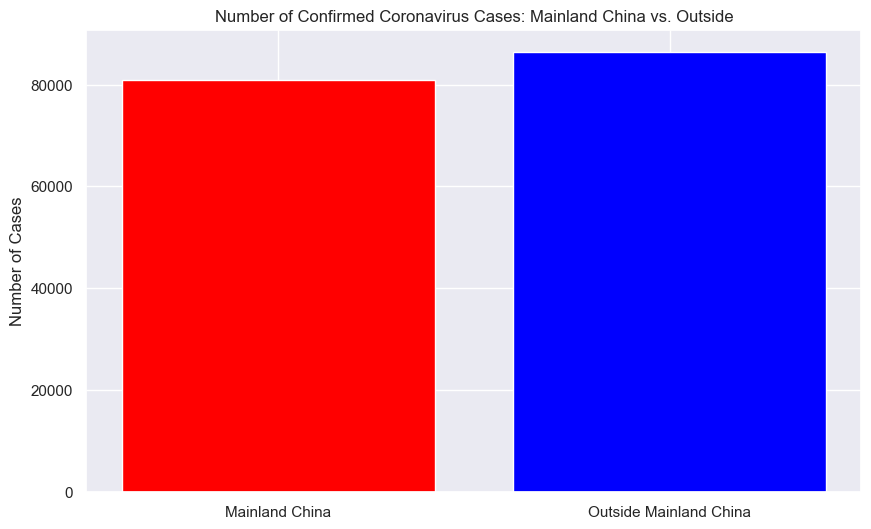


--- China vs. Outside China Cases ---
Mainland China: 81,003 cases
Outside Mainland China: 86,446 cases
Total (World): 167,449 cases


In [33]:
# Simple fix: Recalculate values ensuring they're scalars
china_confirmed = latest_confirmed[latest_confirmed["Country/Region"] == 'China'][dates[-1]].sum()
china_confirmed = float(china_confirmed)  # Convert to scalar

# Get world total (last element of world_cases array)
world_total = float(world_cases[-1].item()) if hasattr(world_cases[-1], 'item') else float(world_cases[-1])
outside_mainland_china_confirmed = world_total - china_confirmed

# Convert to integers for display
china_confirmed = int(china_confirmed)
outside_mainland_china_confirmed = int(outside_mainland_china_confirmed)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(['Mainland China', 'Outside Mainland China'], 
        [china_confirmed, outside_mainland_china_confirmed], 
        color=['red', 'blue'])
plt.title("Number of Confirmed Coronavirus Cases: Mainland China vs. Outside")
plt.ylabel('Number of Cases')
plt.show()

print(f'\n--- China vs. Outside China Cases ---')
print(f'Mainland China: {china_confirmed:,} cases')
print(f'Outside Mainland China: {outside_mainland_china_confirmed:,} cases')
print(f'Total (World): {china_confirmed + outside_mainland_china_confirmed:,} cases')

In [34]:
# --- Province-Specific Calculations ---
unique_provinces = list(confirmed_cases['Province/State'].dropna().unique())
outliers_province = ['United Kingdom', 'Denmark', 'France']
for outlier_country in outliers_province:
    if outlier_country in unique_provinces:
        unique_provinces.remove(outlier_country)

province_confirmed_cases = []
no_cases_provinces = []

for province_name in unique_provinces:
    cases = confirmed_cases[confirmed_cases['Province/State'] == province_name][dates[-1]].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases_provinces.append(province_name)

In [35]:
for p_to_remove in no_cases_provinces:
    if p_to_remove in unique_provinces:
        unique_provinces.remove(p_to_remove)

temp_province_cases = []
for province_name in unique_provinces:
    cases = confirmed_cases[confirmed_cases['Province/State'] == province_name][dates[-1]].sum()
    temp_province_cases.append(cases)
province_confirmed_cases = temp_province_cases

sorted_province_cases = sorted(zip(unique_provinces, province_confirmed_cases),
                               key=operator.itemgetter(1), reverse=True)
unique_provinces = [p for p, c in sorted_province_cases]
province_confirmed_cases = [c for p, c in sorted_province_cases]

print('\n--- Confirmed Cases by Provinces/States/Cities ---')
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {int(province_confirmed_cases[i])} cases ')



--- Confirmed Cases by Provinces/States/Cities ---
Hubei: 67794 cases 
Guangdong: 1360 cases 
Henan: 1273 cases 
Zhejiang: 1231 cases 
Hunan: 1018 cases 
Anhui: 990 cases 
Jiangxi: 935 cases 
Shandong: 760 cases 
Diamond Princess: 742 cases 
New York: 732 cases 
Washington: 643 cases 
Jiangsu: 631 cases 
Chongqing: 576 cases 
Sichuan: 539 cases 
Heilongjiang: 482 cases 
Beijing: 442 cases 
California: 426 cases 
Shanghai: 353 cases 
Hebei: 318 cases 
Fujian: 296 cases 
Guangxi: 252 cases 
Shaanxi: 245 cases 
Yunnan: 174 cases 
Hainan: 168 cases 
Massachusetts: 164 cases 
Guizhou: 146 cases 
Hong Kong: 145 cases 
Tianjin: 136 cases 
New South Wales: 134 cases 
Shanxi: 133 cases 
Gansu: 133 cases 
Colorado: 131 cases 
Liaoning: 125 cases 
Florida: 115 cases 
Ontario: 104 cases 
Georgia: 99 cases 
New Jersey: 98 cases 
Illinois: 93 cases 
Jilin: 93 cases 
Louisiana: 91 cases 
Xinjiang: 76 cases 
Inner Mongolia: 75 cases 
Ningxia: 75 cases 
British Columbia: 73 cases 
Texas: 72 cases 
Pen

In [36]:
print("\n--- Starting Global Confirmed Cases Prediction using SVR ---")

X_pred = days_since_1_22
y_pred = world_cases

# 1. Scaling the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_pred)
y_scaled = scaler_y.fit_transform(y_pred)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)

svm_model = SVR(kernel='rbf', C=0.1, gamma=0.1)
svm_model.fit(X_train_scaled, y_train_scaled.flatten())


--- Starting Global Confirmed Cases Prediction using SVR ---


SVR(C=0.1, gamma=0.1)

In [37]:
# Make predictions on the TEST data (scaled)
y_pred_test_scaled = svm_model.predict(X_test_scaled)

# Inverse transform predictions to original scale for evaluation
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1))
y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# Ensure predictions are non-negative
y_pred_test[y_pred_test < 0] = 0
y_test[y_test < 0] = 0 # Ensure true values are also non-negative for MAPE

# Calculate R-squared and MAPE for SVR
r2_svm = r2_score(y_test, y_pred_test)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0
    if not np.any(non_zero_indices):
        return 0.0 # Or raise error if 0 is unexpected
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

mape_svm = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"\n--- SVR Model Accuracy on Test Set ---")
print(f"R-squared (R2 Score) on Test Set: {r2_svm:.4f} ({r2_svm*100:.2f}%)")
print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape_svm:.2f}%")
print(f"Mean Squared Error (MSE) on Test Set: {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"Mean Absolute Error (MAE) on Test Set: {mean_absolute_error(y_test, y_pred_test):.2f}")


# Make future predictions using the FULL historical dataset for SVR
# Scale the full X data
X_full_scaled = scaler_X.fit_transform(X_pred) # Fit and transform on full data

# Retrain SVR model on full scaled data
svm_model_full = SVR(kernel='rbf', C=0.1, gamma=0.1) # Using same hyperparameters
svm_model_full.fit(X_full_scaled, y_scaled.flatten())

# Prepare future days for prediction (scaled)
future_days_X = future_forecast[len(dates):] # Slice to get only the future days
future_days_X_scaled = scaler_X.transform(future_days_X) # Use the same scaler fitted on full historical X

predicted_cases_future_scaled = svm_model_full.predict(future_days_X_scaled)

# Inverse transform future predictions to original scale
predicted_cases_future = scaler_y.inverse_transform(predicted_cases_future_scaled.reshape(-1, 1))

# Ensure predictions are non-negative
predicted_cases_future[predicted_cases_future < 0] = 0


# Combine historical and predicted dates/cases for plotting
all_days_X_plot = np.concatenate((X_pred, future_days_X)).flatten()
all_cases_y_plot = np.concatenate((world_cases, predicted_cases_future)).flatten()




--- SVR Model Accuracy on Test Set ---
R-squared (R2 Score) on Test Set: -3.9066 (-390.66%)
Mean Absolute Percentage Error (MAPE) on Test Set: 33.50%
Mean Squared Error (MSE) on Test Set: 2333767335.22
Mean Absolute Error (MAE) on Test Set: 43806.90


C:\Users\bhoom\AppData\Local\Temp\ipykernel_32452\1526790625.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(future_forecast[len(dates)-1:].flatten(),


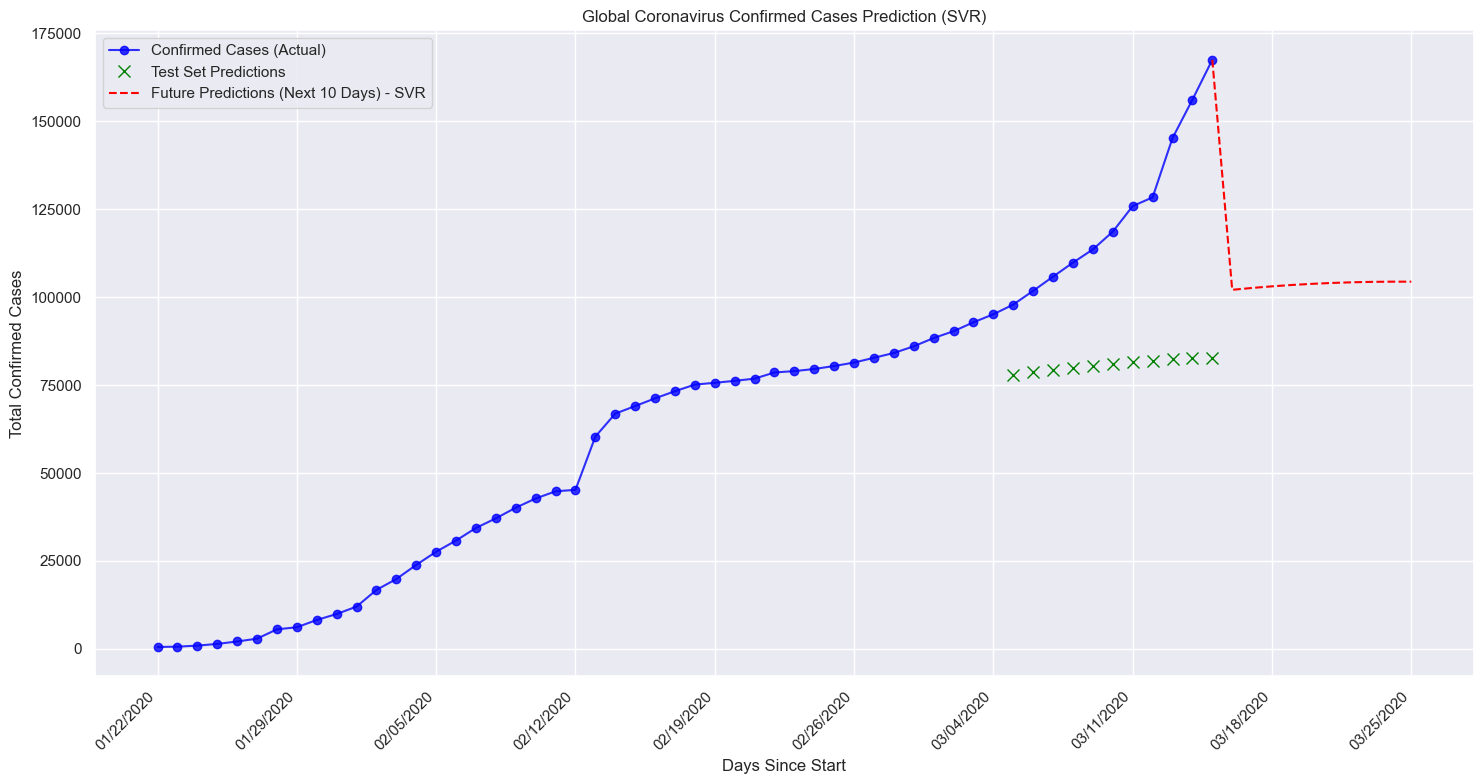

In [40]:
test_split_index = len(days_since_1_22) - len(X_test_scaled) # Calculate start index of test set
X_test_original_for_plot = days_since_1_22[test_split_index:]

# --- Visualize the SVR results ---
plt.figure(figsize=(15, 8))
plt.plot(days_since_1_22.flatten(), world_cases.flatten(), 'o-', label='Confirmed Cases (Actual)', color='blue', alpha=0.8)

# Plot test set predictions using the original X values for the test portion
plt.plot(X_test_original_for_plot.flatten(), y_pred_test.flatten(), 'x', label='Test Set Predictions', color='green', markersize=8)

# Plot future predictions
plt.plot(future_forecast[len(dates)-1:].flatten(),
         np.concatenate((world_cases[-1:], predicted_cases_future)).flatten(),
         'r--', label=f'Future Predictions (Next {len(future_forecast) - len(dates)} Days) - SVR', color='red')

plt.title(f'Global Coronavirus Confirmed Cases Prediction (SVR)') # Simplified title
plt.xlabel('Days Since Start')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.legend()

# --- X-axis date labels (simplified) ---
# This part assumes 'dates' and 'future_forecast_dates' are correctly populated
all_x_plot_points = np.concatenate((days_since_1_22.flatten(), future_forecast[len(dates):].flatten()))
# Select some key dates for ticks, adjust 'step' as needed
tick_indices = np.linspace(0, len(all_x_plot_points) - 1, 10, dtype=int) # Max 10 ticks
tick_labels = [future_forecast_dates[i] for i in tick_indices] # Use future_forecast_dates for all labels

plt.xticks(all_x_plot_points[tick_indices], tick_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

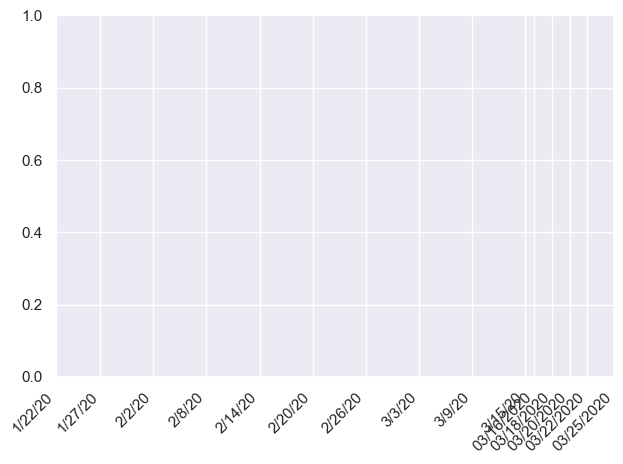


--- Predicted Global Cases for Next 10 Days (SVR) ---
Date: 03/16/2020 (Day 54): 102072 cases
Date: 03/17/2020 (Day 55): 102598 cases
Date: 03/18/2020 (Day 56): 103055 cases
Date: 03/19/2020 (Day 57): 103443 cases
Date: 03/20/2020 (Day 58): 103763 cases
Date: 03/21/2020 (Day 59): 104016 cases
Date: 03/22/2020 (Day 60): 104203 cases
Date: 03/23/2020 (Day 61): 104326 cases
Date: 03/24/2020 (Day 62): 104385 cases
Date: 03/25/2020 (Day 63): 104382 cases


C:\Users\bhoom\AppData\Local\Temp\ipykernel_32452\3243366576.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Date: {future_forecast_dates[len(dates) + i]} (Day {len(dates) + i}): {int(cases)} cases")


In [43]:
# Add date labels to X-axis
actual_date_ticks = np.linspace(0, len(dates) - 1, min(len(dates), 10), dtype=int)
actual_date_labels = [dates[i] for i in actual_date_ticks]

future_forecast_tick_indices = np.linspace(len(dates), len(dates) + days_in_future - 1, min(days_in_future, 5), dtype=int)
future_forecast_tick_positions = future_forecast[future_forecast_tick_indices].flatten()

all_tick_positions = np.concatenate((days_since_1_22[actual_date_ticks].flatten(), future_forecast_tick_positions))
all_tick_labels = actual_date_labels + [future_forecast_dates[i] for i in future_forecast_tick_indices]

sorted_indices = np.argsort(all_tick_positions)
all_tick_positions = all_tick_positions[sorted_indices]
all_tick_labels_sorted = [all_tick_labels[i] for i in sorted_indices]

plt.xticks(all_tick_positions, all_tick_labels_sorted, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print predicted future values
print(f"\n--- Predicted Global Cases for Next {days_in_future} Days (SVR) ---")
for i, cases in enumerate(predicted_cases_future):
    print(f"Date: {future_forecast_dates[len(dates) + i]} (Day {len(dates) + i}): {int(cases)} cases")
